<a href="https://colab.research.google.com/github/vkrisvasan/100days_OSL/blob/main/9_OSL_Autogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install groq autogen-agentchat~=0.2 httpx==0.27.2 matplotlib numpy dask[dataframe] -q

In [2]:
import os
import getpass
credential_names = ["GROQ_API_KEY"]
for credential in credential_names:
  if credential not in os.environ:
    os.environ[credential]=getpass.getpass("Provide your..." + credential)

Provide your...GROQ_API_KEY··········


In [3]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    "chatbot",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    code_execution_config=False,  # Turn off code execution, by default it is off.
    function_map=None,  # No registered functions, by default it is None.
    human_input_mode="NEVER",  # Never ask for human input.
)

In [4]:
reply = agent.generate_reply(messages=[{"content": "Tell me a joke.", "role": "user"}])
print(reply)

{'content': "Here's one:\n\nWhy couldn't the bicycle stand up by itself?\n\nBecause it was two-tired!\n\nHope that made you laugh!", 'refusal': None, 'role': 'assistant', 'audio': None, 'function_call': None, 'tool_calls': None}


In [5]:
cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    human_input_mode="NEVER",  # Never ask for human input.
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    human_input_mode="NEVER",  # Never ask for human input.
)

In [6]:
result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

You want a joke, huh? Alright, here's one: Why did our cat join a band? (wait for it)... Because it wanted to be the purr-cussionist! (giggles) Okay, maybe it's a cat-astrophe of a joke, but hey, that's just how my comedy partner and I roll!

--------------------------------------------------------------------------------
joe (to cathy):

(laughs) Ahahah, nice one, Cathy! I think it's actually paw-some! You always know how to make me laugh. But now it's my turn, I've got a great one. Why couldn't the bicycle stand up by itself? (pauses for dramatic effect)... Because it was two-tired! (laughs) Get it? Two-tired!

--------------------------------------------------------------------------------
cathy (to joe):

(giggles) Oh, oh, oh! That's a wheel good one! (laughs) I'm totally two-tired from laughing now! You always bring the pedal power to our comed

In [7]:

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    human_input_mode="NEVER",  # Never ask for human input.
    max_consecutive_auto_reply=1,  # Limit the number of consecutive auto-replies.
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.")

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

You want a joke, huh? Alright, here's one: Why did our cat join a band? (wait for it)... Because it wanted to be the purr-cussionist! (giggles) Okay, maybe it's a cat-astrophe of a joke, but hey, that's just how my comedy partner and I roll!

--------------------------------------------------------------------------------
joe (to cathy):

(laughs) Ahahah, nice one, Cathy! I think it's actually paw-some! You always know how to make me laugh. But now it's my turn, I've got a great one. Why couldn't the bicycle stand up by itself? (pauses for dramatic effect)... Because it was two-tired! (laughs) Get it? Two-tired!

--------------------------------------------------------------------------------
cathy (to joe):

(giggles) Oh, oh, oh! That's a wheel good one! (laughs) I'm totally two-tired from laughing now! You always bring the pedal power to our comed

In [8]:

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    human_input_mode="NEVER",  # Never ask for human input.
    is_termination_msg=lambda msg: "good bye" in msg["content"].lower(),
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke and then say the words GOOD BYE.")

joe (to cathy):

Cathy, tell me a joke and then say the words GOOD BYE.

--------------------------------------------------------------------------------
cathy (to joe):

Here's one: Why couldn't the bicycle stand up by itself? Because it was two-tired! (get it? two-tired... haha)

GOOD BYE!

--------------------------------------------------------------------------------


In [9]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

In [10]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')
```
This is the end of the message.
"""

# Generate a reply for the given code.
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)

Replying as code_executor_agent. Provide feedback to the sender. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter.png



In [11]:

import os

print(os.listdir(temp_dir.name))
# We can see the output scatter.png and the code file generated by the agent.

['tmp_code_e24bf32d4a21990fb9e4b5eb889ebe5a.py', 'scatter.png']


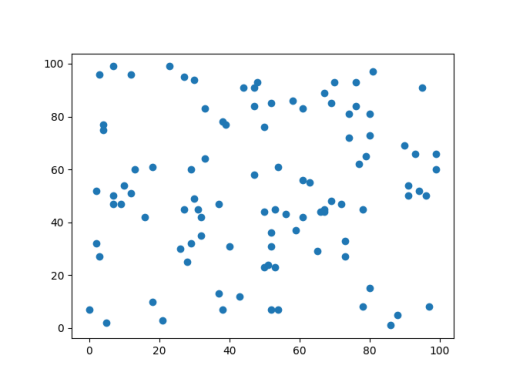

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(os.path.join(temp_dir.name, 'scatter.png'))
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
with open(os.path.join(temp_dir.name, 'tmp_code_e24bf32d4a21990fb9e4b5eb889ebe5a.py'), 'r') as file:
    code = file.read()
    print(code)

import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')


In [14]:
import os

from autogen import ConversableAgent

agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. You have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="NEVER",  # never ask for human input
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

I'll start by guessing 50.

Is my guess too high or too low?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Your guess of 50 is... too low!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Thanks for the feedback!

Okay, so the number is higher than 50. My next guess is 67.

Is my guess too high or too low?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Your guess of 67 is... too high!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

So the number is lower than 67.

My

KeyboardInterrupt: 

In [15]:

human_proxy = ConversableAgent(
    "human_proxy",
    llm_config=False,  # no LLM used for human proxy
    human_input_mode="ALWAYS",  # always ask for human input
)

# Start a chat with the agent with number with an initial guess.
result = human_proxy.initiate_chat(
    agent_with_number,  # this is the same agent with the number as before
    message="10",
)

human_proxy (to agent_with_number):

10

--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

Too low!

--------------------------------------------------------------------------------
Replying as human_proxy. Provide feedback to agent_with_number. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
human_proxy (to agent_with_number):



--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

It seems like you didn't provide a number. Could you please guess a number again?

--------------------------------------------------------------------------------
Replying as human_proxy. Provide feedback to agent_with_number. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
human_pro

In [17]:
agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. "
    "In the first game, you have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    max_consecutive_auto_reply=1,  # maximum number of consecutive auto-replies before asking for human input
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="TERMINATE",  # ask for human input until the game is terminated
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": [{"model": "llama3-8b-8192", "api_key": os.environ.get("GROQ_API_KEY"),"api_type": "groq"}]},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

I'll start by guessing 50.

Is my guess too high or too low?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
agent_with_number (to agent_guess_number):

Too low!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

My next guess is 75.

Is my guess too high or too low?

--------------------------------------------------------------------------------
Please give feedback to agent_guess_number. Press enter to skip and use auto-reply, or type 'exit' to stop the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
agent_with_number (to agent_guess_number):

Still too low!

---------------------------------------------

In [ ]:
stop here

In [ ]:
import os

config_list = [
    {
        # Let's choose the Llama 3 model
        "model": "llama3-8b-8192",
        # Put your Groq API key here or put it into the GROQ_API_KEY environment variable.
        "api_key": os.environ.get("GROQ_API_KEY"),
        # We specify the API Type as 'groq' so it uses the Groq client class
        "api_type": "groq",
    }
]

In [ ]:
from pathlib import Path

from autogen import AssistantAgent, UserProxyAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Setting up the code executor
workdir = Path("coding")
workdir.mkdir(exist_ok=True)
code_executor = LocalCommandLineCodeExecutor(work_dir=workdir)

# Setting up the agents

# The UserProxyAgent will execute the code that the AssistantAgent provides
user_proxy_agent = UserProxyAgent(
    name="User",
    code_execution_config={"executor": code_executor},
    is_termination_msg=lambda msg: "FINISH" in msg.get("content"),
)

system_message = """You are a helpful AI assistant who writes code and the user executes it.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) for the user to execute.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
IMPORTANT: Wait for the user to execute your code and then you can reply with the word "FINISH". DO NOT OUTPUT "FINISH" after your code block."""

# The AssistantAgent, using Groq's model, will take the coding request and return code
assistant_agent = AssistantAgent(
    name="Groq Assistant",
    system_message=system_message,
    llm_config={"config_list": config_list},
)

In [ ]:
# Start the chat, with the UserProxyAgent asking the AssistantAgent the message
chat_result = user_proxy_agent.initiate_chat(
    assistant_agent,
    message="Provide code to count the number of prime numbers from 1 to 10000.",
)